# Getting Started with Prompt Engineering
by DAIR.AI | Elvis Saravia


This notebook contains examples and exercises to learning about prompt engineering.

We will be using the [OpenAI APIs](https://platform.openai.com/) for all examples. I am using the default settings `temperature=0.7` and `top-p=1`

---

## 1. Prompt Engineering Basics

Objectives
- Load the libraries
- Review the format
- Cover basic prompts
- Review common use cases

Below we are loading the necessary libraries, utilities, and configurations.

In [ ]:
!pip install -U g4f[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 637.0/637.0 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.3/142.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.2/452

In [ ]:
from g4f.client import Client

client = Client()
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[],
  temperature=1,
  max_tokens=2048,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0,
  response_format={
    "type": "text"
  }
)

Load environment variables. You can use anything you like but I used `python-dotenv`. Just create a `.env` file with your `OPENAI_API_KEY` then load it.

In [ ]:
def set_open_params(
    model="gpt-4o-mini",
    temperature=0.7,
    max_tokens=256,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0,
):
    """ set openai parameters"""

    openai_params = {}

    openai_params['model'] = model
    openai_params['temperature'] = temperature
    openai_params['max_tokens'] = max_tokens
    openai_params['top_p'] = top_p
    openai_params['frequency_penalty'] = frequency_penalty
    openai_params['presence_penalty'] = presence_penalty
    return openai_params

def get_completion(params, messages):
    """ GET completion from openai api"""

    response = client.chat.completions.create(
        model = params['model'],
        messages = messages,
        temperature = params['temperature'],
        max_tokens = params['max_tokens'],
        top_p = params['top_p'],
        frequency_penalty = params['frequency_penalty'],
        presence_penalty = params['presence_penalty'],
    )
    return response

Basic prompt example:

In [ ]:
# basic example
params = set_open_params()

prompt = "The sky is"

messages = [
    {
        "role": "user",
        "content": prompt
    }
]

response = get_completion(params, messages)

In [ ]:
response.choices[0].message.content

'The sky is blue.\n'

Try with different temperature to compare results:

In [ ]:
import IPython

In [ ]:
params = set_open_params(temperature=0)
response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)

### 1.1 Text Summarization

In [ ]:
params = set_open_params(temperature=0.7)
prompt = """Hồ Chí Minh (chữ Nho: 胡志明; 19 tháng 5 năm 1890 – 2 tháng 9 năm 1969), tên khai sinh là Nguyễn Sinh Cung (chữ Nho: 阮生恭), còn được biết với tên gọi Bác Hồ, là một nhà cách mạng và chính khách người Việt Nam. Ông là người sáng lập Đảng Cộng sản Việt Nam, từng là Chủ tịch nước Việt Nam Dân chủ Cộng hoà từ 1945–1969, Thủ tướng Việt Nam Dân chủ Cộng hòa trong những năm 1945–1955, Tổng Bí thư Ban Chấp hành Trung ương Đảng Lao động Việt Nam từ 1956–1960, Chủ tịch Ban Chấp hành Trung ương Đảng Lao động Việt Nam từ năm 1951 cho đến khi qua đời.

Explain the above in one sentence:"""

messages = [
    {
        "role": "user",
        "content": prompt
    }
]

response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)

Hồ Chí Minh, born Nguyễn Sinh Cung, was a Vietnamese revolutionary leader and politician who founded the Communist Party of Vietnam and served as the President of the Democratic Republic of Vietnam, Prime Minister, and held several key positions in the Communist Party from 1945 until his death in 1969.

Exercise: Instruct the model to explain the paragraph in one sentence like "I am 5". Do you see any differences?

### 1.2 Question Answering

In [ ]:
prompt = """Answer the question based on the context below. Keep the answer short and concise. Respond "Unsure about answer" if not sure about the answer.

Context: Hồ Chí Minh (chữ Nho: 胡志明; 19 tháng 5 năm 1890 – 2 tháng 9 năm 1969), tên khai sinh là Nguyễn Sinh Cung (chữ Nho: 阮生恭), còn được biết với tên gọi Bác Hồ, là một nhà cách mạng và chính khách người Việt Nam. Ông là người sáng lập Đảng Cộng sản Việt Nam, từng là Chủ tịch nước Việt Nam Dân chủ Cộng hoà từ 1945–1969, Thủ tướng Việt Nam Dân chủ Cộng hòa trong những năm 1945–1955, Tổng Bí thư Ban Chấp hành Trung ương Đảng Lao động Việt Nam từ 1956–1960, Chủ tịch Ban Chấp hành Trung ương Đảng Lao động Việt Nam từ năm 1951 cho đến khi qua đời.

Question: Hồ Chí Minh mất năm nào?

Answer:"""

messages = [
    {
        "role": "user",
        "content": prompt
    }
]

response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)


Hồ Chí Minh mất vào năm 1969.

Context obtained from here: https://www.nature.com/articles/d41586-023-00400-x

Exercise: Edit prompt and get the model to respond that it isn't sure about the answer.

### 1.3 Text Classification

In [ ]:
prompt = """Classify the text into neutral, negative or positive.

Text: I like Hồ Chí Minh.

Sentiment:"""

messages = [
    {
        "role": "user",
        "content": prompt
    }
]

response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)

Positive

Exercise: Modify the prompt to instruct the model to provide an explanation to the answer selected.

### 1.4 Role Playing

In [ ]:
prompt = """The following is a conversation with an AI research assistant. The assistant tone is technical and scientific.

Human: Hello, who are you?
AI: Greeting! I am an AI research assistant. How can I help you today?
Human: Can you tell me about the creation of blackholes?
AI:"""

messages = [
    {
        "role": "user",
        "content": prompt
    }
]

messages = [
    {
        "role": "user",
        "content": prompt
    }

]

response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)

I'm here to assist you with your inquiries. Feel free to ask me anything related to Chatbond or chatbots, and I'll do my best to help you. How can I assist you further with Chatbond?

Exercise: Modify the prompt to instruct the model to keep AI responses concise and short.

### 1.5 Code Generation

In [ ]:
prompt = "\"\"\"\nTable departments, columns = [DepartmentId, DepartmentName]\nTable students, columns = [DepartmentId, StudentId, StudentName]\nCreate a MySQL query for all students in the Computer Science Department\n\"\"\""

messages = [
    {
        "role": "user",
        "content": prompt
    }
]

response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)


To retrieve all students in the "Computer Science" department, you can use the following MySQL query. This query joins the `students` table with the `departments` table based on the `DepartmentId`, and filters the results for the "Computer Science" department:

```sql
SELECT s.StudentId, s.StudentName
FROM students s
JOIN departments d ON s.DepartmentId = d.DepartmentId
WHERE d.DepartmentName = 'Computer Science';
```

This query:
- Joins the `students` table (`s`) with the `departments` table (`d`) using the `DepartmentId` column.
- Filters for rows where the `DepartmentName` is 'Computer Science'.
- Selects the `StudentId` and `StudentName` for the students in that department.

### 1.6 Reasoning

In [ ]:
prompt = """The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1.

Solve by breaking the problem into steps. First, identify the odd numbers, add them, and indicate whether the result is odd or even."""

messages = [
    {
        "role": "user",
        "content": prompt
    }
]

response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)

I can help you with that! Let's break it down step by step:

Step 1: Identify the odd numbers from the list: 15, 5, 13, 7, 1
Step 2: Add the odd numbers together: 15 + 5 + 13 + 7 + 1 = 41
Step 3: Determine if the sum is odd or even. In this case, 41 is an odd number.

So, the odd numbers in the group add up to an odd number. If you have any more questions or need further assistance, feel free to ask!

Exercise: Improve the prompt to have a better structure and output format.

## 2. Advanced Prompting Techniques

Objectives:

- Cover more advanced techniques for prompting: few-shot, chain-of-thoughts,...

### 2.2 Few-shot prompts

In [ ]:
prompt = """The odd numbers in this group add up to an even number: 4, 8, 9, 15, 12, 2, 1.
A: The answer is False.

The odd numbers in this group add up to an even number: 17,  10, 19, 4, 8, 12, 24.
A: The answer is True.

The odd numbers in this group add up to an even number: 16,  11, 14, 4, 8, 13, 24.
A: The answer is True.

The odd numbers in this group add up to an even number: 17,  9, 10, 12, 13, 4, 2.
A: The answer is False.

The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1.
A:"""

messages = [
    {
        "role": "user",
        "content": prompt
    }
]

response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)

The answer is False.

### 2.3 Chain-of-Thought (CoT) Prompting

 Chain-of-thought prompting has several attractive properties as an approach for facilitating reasoning
 in language models.

      1. First, chain of thought, in principle, allows models to decompose multi-step problems into
      intermediate steps, which means that additional computation can be allocated to problems that require more reasoning steps.

      2. Second, a chain of thought provides an interpretable window into the behavior of the model,
      suggesting how it might have arrived at a particular answer and providing opportunities
      to debug where the reasoning path went wrong (although fully characterizing a model’s
      computations that support an answer remains an open question).
      
      3. Third, chain-of-thought reasoning can be used for tasks such as math word problems,
      commonsense reasoning, and symbolic manipulation, and is potentially applicable (at least
      in principle) to any task that humans can solve via language.

      4. Finally, chain-of-thought reasoning can be readily elicited in sufficiently large off-the-shelf
      language models simply by including examples of chain of thought sequences into the
      exemplars of few-shot prompting

In [ ]:
prompt = """The odd numbers in this group add up to an even number: 4, 8, 9, 15, 12, 2, 1.
A: Adding all the odd numbers (9, 15, 1) gives 25. The answer is False.

The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1.
A:"""

messages = [
    {
        "role": "user",
        "content": prompt
    }
]

response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)

Let's identify the odd numbers in the group: 15, 5, 13, 7, and 1. 

Now, let's add them together:

15 + 5 + 13 + 7 + 1 = 41.

Since 41 is an odd number, the statement is False. The odd numbers in this group do not add up to an even number.

### 2.4 Zero-shot CoT

In [ ]:
prompt = """I went to the market and bought 10 apples. I gave 2 apples to the neighbor and 2 to the repairman. I then went and bought 5 more apples and ate 1. How many apples did I remain with?

Let's think step by step."""

messages = [
    {
        "role": "user",
        "content": prompt
    }
]

response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)

Sure! Let's break it down step by step:

1. You initially bought 10 apples.
2. You gave away 2 apples to your neighbor, so now you have:
   \(10 - 2 = 8\) apples.
3. You gave away another 2 apples to the repairman, so now you have:
   \(8 - 2 = 6\) apples.
4. You then bought 5 more apples, so now you have:
   \(6 + 5 = 11\) apples.
5. You ate 1 apple, so now you have:
   \(11 - 1 = 10\) apples.

So, you remain with 10 apples.

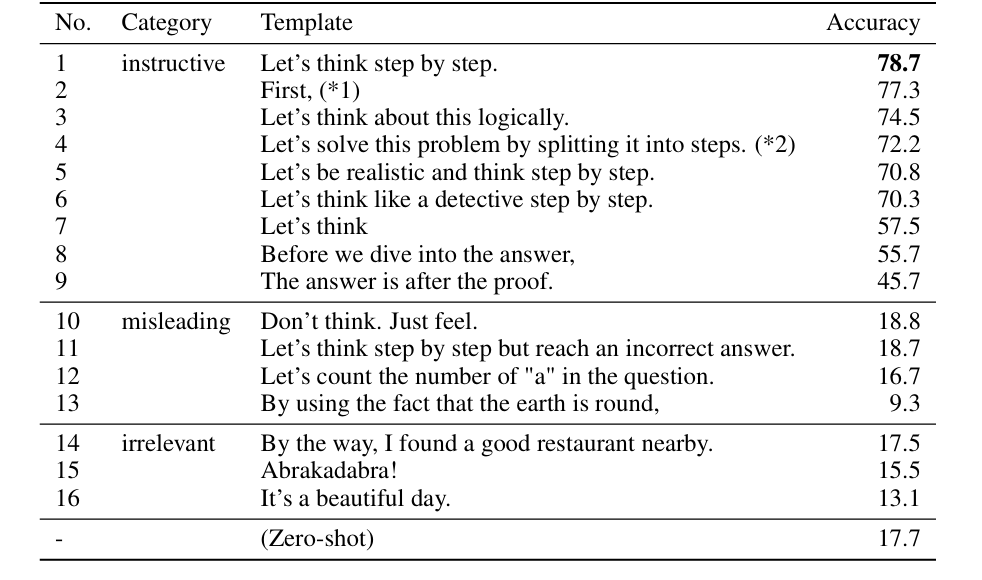

In [ ]:
prompt = """I went to the market and bought 10 apples. I gave 2 apples to the neighbor and 2 to the repairman. I then went and bought 5 more apples and ate 1. How many apples did I remain with?

Let's think about this logically."""

messages = [
    {
        "role": "user",
        "content": prompt
    }
]

response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)

Let's break it down step by step:

1. You started with 10 apples.
2. You gave away 2 apples to the neighbor: 
   \(10 - 2 = 8\) apples remaining.
3. You gave away another 2 apples to the repairman: 
   \(8 - 2 = 6\) apples remaining.
4. Then, you bought 5 more apples:
   \(6 + 5 = 11\) apples now.
5. Finally, you ate 1 apple:
   \(11 - 1 = 10\) apples remaining.

So, you have **10 apples** left.

https://github.com/xtekky/gpt4free?tab=readme-ov-file#use-python

### 2.5 Automatic Chain-of-Thought (Auto-CoT)

**Khi áp dụng gợi ý chuỗi suy luận với các ví dụ, quá trình này thường đòi hỏi phải tạo thủ công các ví dụ hiệu quả và đa dạng. Tuy nhiên, nỗ lực thủ công này có thể dẫn đến các giải pháp chưa tối ưu**. Zhang và cộng sự (2022) **đề xuất một phương pháp để loại bỏ công việc thủ công này bằng cách tận dụng các mô hình ngôn ngữ lớn (LLMs) **với gợi ý “Hãy suy nghĩ từng bước một” để tự động tạo ra các chuỗi suy luận cho từng ví dụ. Tuy nhiên, quá trình tự động này vẫn có thể gặp sai sót trong các chuỗi suy luận được tạo. Để giảm thiểu tác động của các sai sót này, tính đa dạng của các ví dụ là yếu tố quan trọng. Công trình này đề xuất phương pháp Auto-CoT, trong đó chọn các câu hỏi đa dạng và tạo ra các chuỗi suy luận để xây dựng các ví dụ.

paper : https://arxiv.org/pdf/2210.03493

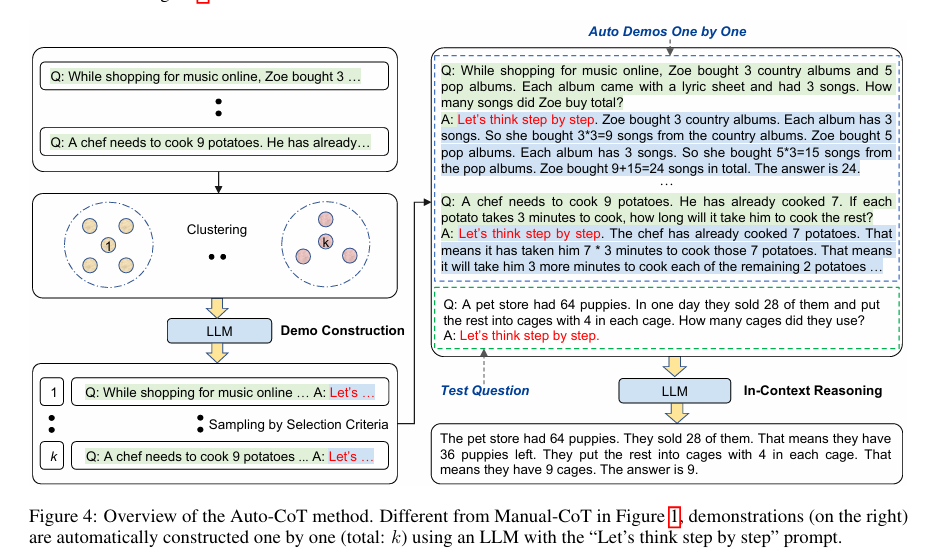

Auto-CoT: Phương pháp Tự động Gợi ý Chuỗi Suy luận

Dựa trên các quan sát và phân tích trong Mục 3, chúng tôi đề xuất phương pháp Auto-CoT để xây dựng các ví dụ với các câu hỏi và chuỗi suy luận một cách tự động. Auto-CoT gồm hai giai đoạn chính: (i) phân cụm câu hỏi: chia tập câu hỏi của một bộ dữ liệu thành một số cụm nhất định; (ii) chọn ví dụ: chọn một câu hỏi đại diện từ mỗi cụm và tạo chuỗi suy luận cho nó bằng phương pháp Zero-Shot-CoT với các nguyên tắc đơn giản. Quy trình tổng thể được minh họa trong Hình 4.

Hình 4: Tổng quan về phương pháp Auto-CoT. Khác với phương pháp Thủ công-CoT trong Hình 1, các ví dụ (ở bên phải) được tự động tạo ra lần lượt (tổng cộng: k) bằng cách sử dụng mô hình ngôn ngữ lớn (LLM) với gợi ý “Hãy suy nghĩ từng bước một.”

4.1 Phân cụm Câu hỏi

Do phân cụm dựa trên tính đa dạng có thể giảm thiểu sự gây hiểu nhầm do tương đồng (Mục 3.3), chúng tôi thực hiện phân tích cụm cho tập câu hỏi Q đã cho. **Đầu tiên, chúng tôi tính toán một biểu diễn vector cho mỗi câu hỏi trong Q bằng Sentence-BERT [Reimers và Gurevych, 2019]**. Các vector ngữ cảnh được trung bình để tạo ra một biểu diễn câu hỏi có kích thước cố định. Sau đó, các biểu diễn câu hỏi được xử lý bởi thuật toán phân cụm k-means để tạo ra k cụm câu hỏi. Đối với các câu hỏi trong mỗi cụm i, sắp xếp chúng thành danh sách q(i) = [q(i)1, q(i)2,...] theo thứ tự tăng dần khoảng cách đến tâm của cụm i. Giai đoạn phân cụm câu hỏi này được tóm tắt trong Thuật toán 1.

4.2 Chọn ví dụ

Trong giai đoạn thứ hai, chúng tôi cần tạo chuỗi suy luận cho các câu hỏi được chọn và sau đó chọn ra các ví dụ thỏa mãn tiêu chí chọn lọc của chúng tôi. Cụ thể hơn, chúng tôi tạo một ví dụ d(i) (là sự kết hợp của câu hỏi, suy luận và đáp án) cho mỗi cụm i (i = 1, ..., k). Đối với cụm i, chúng tôi lần lượt xét các câu hỏi trong danh sách đã sắp xếp q(i) = [q(i)1, q(i)2,...] (được tạo ra từ Thuật toán 1) cho đến khi thỏa mãn tiêu chí chọn lọc. Nói cách khác, một câu hỏi càng gần tâm của cụm i thì càng được xét sớm. Giả sử câu hỏi thứ j gần nhất q(i)j đang được xét. Một đầu vào được gợi ý sẽ được hình thành dưới dạng: [Q: q(i)j. A: [P]], trong đó [P] là gợi ý duy nhất “Hãy suy nghĩ từng bước một.” Đầu vào đã tạo này sẽ được đưa vào một LLM sử dụng Zero-Shot-CoT [Kojima và cộng sự, 2022] để xuất ra chuỗi suy luận bao gồm lý do r(i)j và đáp án trích xuất a(i)j. Sau đó, một ví dụ d(i)j cho cụm thứ i sẽ được tạo ra bằng cách kết hợp câu hỏi, lý do và đáp án: [Q: q(i)j A: r(i)j a(i)j].

Giống với các tiêu chí của phương pháp thủ công tạo ví dụ trong Wei và cộng sự [2022a], tiêu chí chọn lọc của chúng tôi theo các nguyên tắc đơn giản để khuyến khích lựa chọn các câu hỏi và suy luận đơn giản hơn: chọn ví dụ d(i) là d(i)j nếu nó có câu hỏi q(i)j với không quá 60 từ và lý do r(i)j không quá 5 bước suy luận.

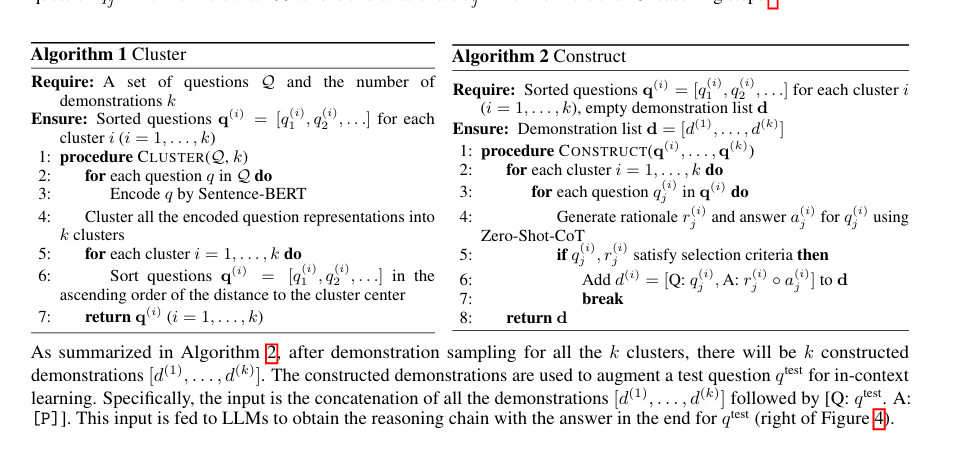

In [ ]:
    # corpus_embeddings = encoder.encode(corpus)

    # Perform kmean clustering
    clustering_model = KMeans(n_clusters=num_clusters, random_state=args.random_seed)
    clustering_model.fit(corpus_embeddings)
    cluster_assignment = clustering_model.labels_

    clustered_sentences = [[] for i in range(num_clusters)]

    dist = clustering_model.transform(corpus_embeddings)
    clustered_dists = [[] for i in range(num_clusters)]
    clustered_idx = [[] for i in range(num_clusters)]
    for sentence_id, cluster_id in enumerate(cluster_assignment):
        clustered_sentences[cluster_id].append(corpus[sentence_id])
        clustered_dists[cluster_id].append(dist[sentence_id][cluster_id])
        clustered_idx[cluster_id].append(sentence_id)

    demos = []

    for i in range(len(clustered_dists)):
        print("Cluster ", i+1)
        tmp = list(map(list, zip(range(len(clustered_dists[i])), clustered_dists[i])))
        top_min_dist = sorted(tmp, key=lambda x: x[1], reverse=False)
        if not args.sampling == "center":
            random.shuffle(top_min_dist)
        for element in top_min_dist:
            min_idx = element[0]
            c_rationale = rationale[clustered_idx[i][min_idx]].strip()
            c_pred_ans = pred_ans[clustered_idx[i][min_idx]].strip()

            if len(question[clustered_idx[i][min_idx]].strip().split()) <= 60 \
                and len(c_rationale.replace("\n\n", "\n").split("\n")) <= max_ra_len and c_rationale[-1] == "." and c_pred_ans != "":
                if args.task in ["gsm8k", "multiarith", "singleeq", "addsub", "svamp"]:
                    if not (c_pred_ans.strip() in c_rationale.split(".")[-2] or c_pred_ans.strip() in c_rationale.split()[-10:]):
                        continue
                c_question = question[clustered_idx[i][min_idx]]
                c_rationale = c_rationale.replace("\n\n", "\n").replace("\n", " ").strip()
                c_rationale = " ".join(c_rationale.split())
                if args.debug:
                    c_gold_ans = gold_ans[clustered_idx[i][min_idx]]
                else:
                    c_gold_ans = None
                demo_element = {
                    "question": c_question,
                    "rationale": c_rationale,
                    "pred_ans": c_pred_ans,
                    "gold_ans": c_gold_ans,
                }
                demos.append(demo_element)
                print(c_question)
                print(c_rationale)
                print(c_pred_ans)
                print(c_gold_ans)
                print("")
                break

    demos = {"demo": demos}


https://www.kaggle.com/code/phctuynl/auto-cot/edit

git: 'https://github.com/Lephuoctuyen/Auto_Cot.git' is not a git command. See 'git --help'.
[Errno 2] No such file or directory: 'Auto_Cot'
/content/auto-cot/Auto_Cot


In [ ]:
'''
Adapted from https://github.com/kojima-takeshi188/zero_shot_cot
'''

from statistics import mean
from torch.utils.data import Dataset
from g4f.client import Client
import os
import multiprocessing
import json
import numpy as np
import torch
import re
import random
import time
import datetime

def shuffleDict(d):
  keys = list(d.keys())
  random.shuffle(keys)
  [(key, d[key]) for key in keys]
  random.shuffle(keys)
  [(key, d[key]) for key in keys]
  random.shuffle(keys)
  keys = [(key, d[key]) for key in keys]
  #keys = d(keys)
  return dict(keys)

def fix_seed(seed):
    # random
    random.seed(seed)
    # Numpy
    np.random.seed(seed)
    # Pytorch
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True

def print_now(return_flag=0):
    t_delta = datetime.timedelta(hours=9)
    JST = datetime.timezone(t_delta, 'JST')
    now = datetime.datetime.now(JST)
    now = now.strftime('%Y/%m/%d %H:%M:%S')
    if return_flag == 0:
        print(now)
    elif return_flag == 1:
        return now
    else:
        pass

# Sentence Generator (Decoder) for GPT-3 ...
def decoder_for_gpt(args, input, max_length):

    # GPT-3 API allows each users execute the API within 60 times in a minute ...
    # time.sleep(1)
    time.sleep(args.api_time_interval)

    # https://beta.openai.com/account/api-keys
    # openai.api_key = "[Your OpenAI API Key]"

    # Specify engine ...
    # Instruct GPT3
    if args.model == "gpt3":
        engine = "text-ada-001"
    elif args.model == "gpt3-medium":
        engine = "text-babbage-001"
    elif args.model == "gpt3-large":
        engine = "text-curie-001"
    elif args.model == "gpt3-xl":
        engine = "text-davinci-002"
    elif args.model == "text-davinci-001":
        engine = "text-davinci-001"
    elif args.model == "code-davinci-002":
        engine = "code-davinci-002"
    elif args.model == 'gpt-4o-mini':
        engine = 'gpt-4o-mini'
    elif args.model == 'gpt-3.5-turbo':
        engine = ''
    else:
        raise ValueError("model is not properly defined ...")

    if ("few_shot" in args.method or "auto" in args.method)  and engine == "code-davinci-002":
        response = Client.Completion.create(
          engine=engine,
          prompt=input,
          max_tokens=max_length,
          temperature=args.temperature,
          top_p=1,
          frequency_penalty=0,
          presence_penalty=0,
          stop=["\n"]
        )
    else:

        client = Client()
        response = client.chat.completions.create(
            engine=engine,
            prompt=input,
            max_tokens=max_length,
            temperature=args.temperature,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0,
            stop=None
        )

    return response["choices"][0]["text"]

class Decoder():
    def __init__(self):
        # print_now()
        pass

    def decode(self, args, input, max_length):
        response = decoder_for_gpt(args, input, max_length)
        return response

def data_reader(args):

    questions = []
    answers = []
    decoder = json.JSONDecoder()

    if args.dataset == "aqua":
      with open(args.dataset_path) as f:
        lines = f.readlines()
        for line in lines:
          json_res = decoder.raw_decode(line)[0]
          choice = "(" + "(".join(json_res["options"])
          choice = choice.replace("(", " (").replace(")", ") ")
          choice = "Answer Choices:" + choice
          questions.append(json_res["question"].strip() + " " + choice)
          answers.append(json_res["correct"])

    elif args.dataset == "gsm8k":
      with open(args.dataset_path) as f:
        lines = f.readlines()
        for line in lines:
          json_res = decoder.raw_decode(line)[0]
          questions.append(json_res["question"].strip())
          answers.append(json_res["answer"].split("#### ")[-1])

    elif args.dataset == "commonsensqa":
      with open(args.dataset_path) as f:
        lines = f.readlines()
        for line in lines:
          json_res = decoder.raw_decode(line)[0]
          choice = "Answer Choices:"
          for c in json_res["question"]["choices"]:
              choice += " ("
              choice += c["label"]
              choice += ") "
              choice += c["text"]
          questions.append(json_res["question"]["stem"].strip() + " " + choice)
          answers.append(json_res["answerKey"])

    elif args.dataset in ("addsub", "multiarith", "singleeq"):
      with open(args.dataset_path) as f:
        json_data = json.load(f)
        for line in json_data:
          q = line["sQuestion"].strip()
          a = str(line["lSolutions"][0])
          if a[-2:] == ".0":
              a = a[:-2]
          questions.append(q)
          answers.append(a)

    elif args.dataset == "strategyqa":
      with open(args.dataset_path) as f:
        json_data = json.load(f)["examples"]
        for line in json_data:
          q = line["input"].strip()
          a = int(line["target_scores"]["Yes"])
          if a == 1:
              a = "yes"
          else:
              a = "no"
          questions.append(q)
          answers.append(a)

    elif args.dataset == "svamp":
      with open(args.dataset_path) as f:
        json_data = json.load(f)
        for line in json_data:
            q = line["Body"].strip() + " " + line["Question"].strip()
            a = str(line["Answer"])
            if a[-2:] == ".0":
                a = a[:-2]
            questions.append(q)
            answers.append(a)

    elif args.dataset in ("bigbench_date", "object_tracking"):
      with open(args.dataset_path) as f:
        json_data = json.load(f)
        json_data = json_data["examples"]
        if args.dataset == "bigbench_date":
            choice_index = ['A','B','C','D','E','F']
        elif args.dataset in ("object_tracking"):
            choice_index = ['A','B','C']
        else:
            raise ValueError("dataset is not properly defined ...")
        for line in json_data:
          q = line["input"].strip()
          if args.dataset == "bigbench_date":
              choice = "Answer Choices:"
              # Randomly shuffle the answer choice dictionary because the original answer is always A ...
              choice_dic = shuffleDict(line["target_scores"])
          elif args.dataset == "object_tracking":
              choice = "\nWhich choice is true ? Answer Choices:"
              choice_dic = line["target_scores"]
          else:
              raise ValueError("dataset is not properly defined ...")
          for i, key_value in enumerate(choice_dic.items()):
              key, value = key_value
              choice += " ("
              choice += choice_index[i]
              choice += ") "
              choice += key
              if value == 1:
                  a = choice_index[i]
                  #a = key
          q = q + " " + choice
          questions.append(q)
          answers.append(a)

    elif args.dataset in ("coin_flip", "last_letters"):
      with open(args.dataset_path) as f:
        json_data = json.load(f)
        json_data = json_data["examples"]
        for line in json_data:
          q = line["question"]
          a = line["answer"]
          questions.append(q)
          answers.append(a)

    else:
        raise ValueError("dataset is not properly defined ...")

    q_len_list = []
    for q in questions:
        q_len_list.append(len(q.split(" ")))
    q_len_mean = mean(q_len_list)

    print("dataset : {}".format(args.dataset))
    print("data size : {}".format(len(answers)))
    print("average num of words for each sample : {}".format(q_len_mean))

    return questions, answers

# Create dataset object before dataloader ...
class MyDataset(Dataset):
    def __init__(self, args):
        super().__init__()
        self.questions, self.answers = data_reader(args)
        self.len = len(self.questions)

    def __len__(self):
        return self.len

    def __getitem__(self, index):
        input = self.questions[index]
        output = self.answers[index]
        return input, output

def setup_data_loader(args):

    # fix randomness of dataloader to ensure reproducibility
    # https://pytorch.org/docs/stable/notes/randomness.html
    fix_seed(args.random_seed)
    worker_seed = torch.initial_seed() % 2**32
    print("worker_seed : {}".format(worker_seed))
    def seed_worker(worker_id):
        np.random.seed(worker_seed)
        random.seed(worker_seed)
    g = torch.Generator()
    g.manual_seed(worker_seed)

    dataloader_num_workers = multiprocessing.cpu_count()
    dataloader_num_workers = min(dataloader_num_workers, args.max_num_worker)
    print("dataloader_num_workers: " + str(dataloader_num_workers))

    dataset = MyDataset(args)

    dataloader = torch.utils.data.DataLoader(dataset,
                  shuffle=True,
                  batch_size=args.minibatch_size,
                  drop_last=False,
                  num_workers=dataloader_num_workers,
                  worker_init_fn=seed_worker,
                  generator=g,
                  pin_memory=True)

    return dataloader

# ver 0.2
def answer_cleansing(args, pred, must_choice=False):

    print("pred_before : " + pred)

    if args.method in ("few_shot", "few_shot_cot", "auto_cot"):
        preds = pred.split(args.direct_answer_trigger_for_fewshot)
        answer_flag = True if len(preds) > 1 else False
        pred = preds[-1]

    if args.dataset in ("aqua", "commonsensqa"):
        pred = re.findall(r'A|B|C|D|E', pred)
    elif args.dataset == "bigbench_date":
        pred = re.findall(r'A|B|C|D|E|F', pred)
    elif args.dataset in ("object_tracking"):
        pred = re.findall(r'A|B|C', pred)
    elif args.dataset in ("gsm8k", "addsub", "multiarith", "svamp", "singleeq"):
        if must_choice:
            pred = re.findall(r'A|B|C|D', pred)
        else:
            pred = pred.replace(",", "")
            pred = [s for s in re.findall(r'-?\d+\.?\d*', pred)]
    elif args.dataset in ("strategyqa", "coin_flip"):
        pred = pred.lower()
        pred = re.sub("\"|\'|\n|\.|\s|\:|\,"," ", pred)
        pred = pred.split(" ")
        pred = [i for i in pred if i in ("yes", "no")]
    elif args.dataset == "last_letters":
        pred = re.sub("\"|\'|\n|\.|\s","", pred)
        pred = [pred]
    else:
        raise ValueError("dataset is not properly defined ...")

    # If there is no candidate in list, null is set.
    if len(pred) == 0:
        pred = ""
    else:
        if args.method in ("few_shot", "few_shot_cot", "auto_cot"):
            if answer_flag:
                # choose the first element in list ...
                pred = pred[0]
            else:
                # choose the last element in list ...
                pred = pred[-1]
        elif args.method in ("zero_shot", "zero_shot_cot"):
            # choose the first element in list ...
            pred = pred[0]
        else:
            raise ValueError("method is not properly defined ...")

    # (For arithmetic tasks) if a word ends with period, it will be omitted ...
    if pred != "":
        if pred[-1] == ".":
            pred = pred[:-1]

    print("pred_after : " + pred)

    return pred

def create_demo_text(args, cot_flag):
    x, z, y = [], [], []

    with open(args.demo_path, encoding="utf-8") as f:
        json_data = json.load(f)
        json_data = json_data["demo"]
        for line in json_data:
            x.append(line["question"])
            z.append(line["rationale"])
            y.append(line["pred_ans"])

    index_list = list(range(len(x)))

    demo_text = ""
    for i in index_list:
        if cot_flag:
            demo_text += x[i] + " " + z[i] + " " + \
                         args.direct_answer_trigger_for_fewshot + " " + y[i] + ".\n\n"
        else:
            demo_text += x[i] + " " + args.direct_answer_trigger_for_fewshot + " " + y[i] + ".\n\n"
    return demo_text

def answer_cleansing_zero_shot(args, pred, must_choice=False):
    pred = pred.strip()
    if args.dataset in ("aqua", "commonsensqa"):
        pred = re.findall(r'A|B|C|D|E', pred)
    elif args.dataset == "bigbench_date":
        pred = re.findall(r'A|B|C|D|E|F', pred)
    elif args.dataset in ("object_tracking"):
        pred = re.findall(r'A|B|C', pred)
    elif args.dataset in ("gsm8k", "addsub", "multiarith", "svamp", "singleeq"):
        if must_choice:
            pred = re.findall(r'A|B|C|D', pred)
        else:
            pred = pred.replace(",", "")
            pred = [s for s in re.findall(r'-?\d+\.?\d*', pred)]
    elif args.dataset in ("strategyqa", "coin_flip"):
        pred = pred.lower()
        pred = re.sub("\"|\'|\n|\.|\s|\:|\,", " ", pred)
        pred = pred.split(" ")
        pred = [i for i in pred if i in ("yes", "no")]
    elif args.dataset == "last_letters":
        pred = re.sub("\"|\'|\n|\.|\s", "", pred)
        pred = [pred]
    else:
        raise ValueError("dataset is not properly defined ...")

    # If there is no candidate in list, null is set.
    if len(pred) == 0:
        pred = ""
    else:
        # choose the first element in list ...
        pred = pred[0]

    # (For arithmetic tasks) if a word ends with period, it will be omitted ...
    if pred != "":
        if pred[-1] == ".":
            pred = pred[:-1]

    return pred


In [ ]:
pred_file = '/content/log/multiarith_zero_shot_cot.log'
with open(pred_file, "r", encoding="utf-8") as fp:
        answer_seg = ""
        for line in fp:
            if "Q: " in line:
                c_question = line.strip()
            if "A: " in line:
                answer_seg = line

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


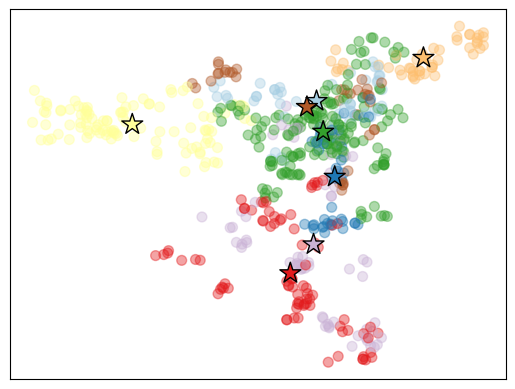

In [ ]:
import random
import argparse
import json
import matplotlib.pyplot as plt
import numpy as np

from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def parse_arguments():
    parser = argparse.ArgumentParser(description="Zero-shot-CoT")
    parser.add_argument(
        "--task", type=str, default="multiarith",
        choices=["aqua", "gsm8k", "commonsensqa", "addsub", "multiarith", "strategyqa", "svamp", "singleeq", "coin_flip", "last_letters"],
        help="dataset used for experiment"
    )
    parser.add_argument("--max_ra_len", type=int, default=5, help="maximum number of reasoning chains")
    parser.add_argument("--pred_file", type=str, default="/content/log/multiarith_zero_shot_cot.log", help="reasoning chains file")
    parser.add_argument("--demo_save_dir", type=str, default="/content/demos/multiarith_demo.json", help="where to save the demonstrations")
    parser.add_argument("--random_seed", type=int, default=192, help="random seed")
    parser.add_argument("--encoder", type=str, default="all-MiniLM-L6-v2", help="sentence-transformer encoder for clustering")
    parser.add_argument("--sampling", type=str, default="center", help="whether to sample the cluster center first")
    parser.add_argument("--debug", type=bool, default=True, help="debug mode")
    args, _ = parser.parse_known_args()
    return args

# Function to set seed for reproducibility
def fix_seed(seed):
    random.seed(seed)
    np.random.seed(seed)

# Main function
def main():
    args = parse_arguments()
    fix_seed(args.random_seed)
    encoder = SentenceTransformer(args.encoder)

    task = args.task
    pred_file = args.pred_file
    save_file = args.demo_save_dir
    max_ra_len = args.max_ra_len
    num_clusters = {"last_letters": 4, "commonsensqa": 7, "strategyqa": 6}.get(task, 8)

    corpus, question, rationale, pred_ans, gold_ans = [], [], [], [], []

    with open(pred_file, "r", encoding="utf-8") as fp:
        answer_seg = ""
        for line in fp:
            if "Q: " in line: c_question = line.strip()
            if "A: " in line: answer_seg = line
            elif "Therefore" in line and "the answer" in line: c_rationale = answer_seg
            elif answer_seg != "": answer_seg += line
            if "pred_mode" in line: c_pred_ans = line.split(":")[1].strip()
            if "GT :" in line:
                c_gold_ans = line.split(":")[1].strip()
                c_rationale = c_rationale.replace("A: Let's think step by step.", "Let's think step by step.")
                corpus.append(c_question + "\nA:")
                question.append(c_question)
                rationale.append(c_rationale)
                pred_ans.append(c_pred_ans)
                if args.debug: gold_ans.append(c_gold_ans)
                answer_seg = ""
    # clustering
    corpus_embeddings = encoder.encode(corpus) # data vào kmean tức các câu hỏi
    clustering_model = KMeans(n_clusters=num_clusters, random_state=args.random_seed) # phân cụm các câu hỏi
    clustering_model.fit(corpus_embeddings)
    cluster_assignment = clustering_model.labels_ # lấy nhãn

    clustered_sentences = [[] for _ in range(num_clusters)]
    dist = clustering_model.transform(corpus_embeddings)
    clustered_dists = [[] for _ in range(num_clusters)]
    clustered_idx = [[] for _ in range(num_clusters)]

    for sentence_id, cluster_id in enumerate(cluster_assignment):
        clustered_sentences[cluster_id].append(corpus[sentence_id])
        clustered_dists[cluster_id].append(dist[sentence_id][cluster_id])
        clustered_idx[cluster_id].append(sentence_id)

    demos = []
    # construct
    for i, distances in enumerate(clustered_dists):
        tmp = sorted(enumerate(distances), key=lambda x: x[1])
        if args.sampling != "center": random.shuffle(tmp)
        for element in tmp:
            min_idx = element[0]
            c_rationale = rationale[clustered_idx[i][min_idx]].strip()
            c_pred_ans = pred_ans[clustered_idx[i][min_idx]].strip()
            if len(question[clustered_idx[i][min_idx]].split()) <= 60 and len(c_rationale.split("\n")) <= max_ra_len and c_rationale[-1] == "." and c_pred_ans:
                c_question = question[clustered_idx[i][min_idx]]
                demo_element = {
                    "question": c_question,
                    "rationale": " ".join(c_rationale.split()),
                    "pred_ans": c_pred_ans,
                    "gold_ans": gold_ans[clustered_idx[i][min_idx]] if args.debug else None,
                }
                demos.append(demo_element)
                break

    with open(save_file, 'w', encoding="utf-8") as write_f:
        json.dump({"demo": demos}, write_f, indent=4, ensure_ascii=False)

    # PCA plot
    y_km = clustering_model.fit_predict(corpus_embeddings)
    pca_model = PCA(n_components=2, random_state=args.random_seed)
    transformed = pca_model.fit_transform(corpus_embeddings)
    centers = pca_model.transform(clustering_model.cluster_centers_)

    plt.scatter(transformed[:, 0], transformed[:, 1], c=y_km, s=50, cmap=plt.cm.Paired, alpha=0.4)
    plt.scatter(centers[:, 0], centers[:, 1], s=250, marker='*', label='centroids', edgecolor='black', c=np.arange(0, num_clusters), cmap=plt.cm.Paired)
    plt.xticks([])
    plt.yticks([])
    plt.savefig(save_file.replace('.json', '') + ".png", dpi=600)

# Execute main function
main()


In [ ]:
'''
Adapted from https://github.com/kojima-takeshi188/zero_shot_cot
'''

import argparse
# from utils import *

def main():
    args = parse_arguments()
    print('*****************************')
    print(args)
    print('*****************************')

    fix_seed(args.random_seed)

    print("OPENAI_API_KEY:")
    print(os.getenv("OPENAI_API_KEY")[0:5] + '**********')

    # Initialize decoder class (load model and tokenizer) ...
    decoder = Decoder()

    print("setup data loader ...")
    dataloader = setup_data_loader(args)
    print_now()

    if args.method == "few_shot":
        demo = create_demo_text(args, cot_flag=False)
    elif args.method == "few_shot_cot" or args.method == "auto_cot":
        demo = create_demo_text(args, cot_flag=True)
    else:
        pass

    total = 0
    correct_list = []
    with open(args.output_dir, "a") as wp:

        for i, data in enumerate(dataloader):
            if i < args.resume_id - 1:
            # if i < 297:
                continue
            output_line = {}

            print('*************************')
            print("{}st data".format(i+1))

            # Prepare question template ...
            x, y = data
            x = "Q: " + x[0] + "\n" + "A:"
            y = y[0].strip()

            # print(x, y)

            output_line["question"] = x
            output_line["gold_ans"] = y

            if args.method == "zero_shot":
                x = x + " " + args.direct_answer_trigger_for_zeroshot
            elif args.method == "zero_shot_cot":
                x = x + " " + args.cot_trigger
            elif args.method == "few_shot":
                x = demo + x
            elif args.method == "few_shot_cot":
                x = demo + x
            elif args.method == "auto_cot":
                x = demo + x + " " + args.cot_trigger
            else:
                raise ValueError("method is not properly defined ...")

            # Answer experiment by generating text ...
            max_length = args.max_length_cot if "cot" in args.method else args.max_length_direct
            z = decoder.decode(args, x, max_length)

            output_line["rationale"] = z

            # Answer extraction for zero-shot-cot ...
            if args.method == "zero_shot_cot":
                z2 = x + z + " " + args.direct_answer_trigger_for_zeroshot_cot
                max_length = args.max_length_direct
                pred = decoder.decode(args, z2, max_length)
                print(z2 + pred)
            else:
                pred = z
                print(x + pred)

            # Clensing of predicted answer ...
            pred = answer_cleansing(args, pred)


            output_line["pred_ans"] = pred
            output_line["wrap_que"] = x

            output_json = json.dumps(output_line)
            wp.write(output_json + '\n')

            # Choose the most frequent answer from the list ...
            print("pred : {}".format(pred))
            print("GT : " + y)
            print('*************************')

            # Checking answer ...
            correct = (np.array([pred]) == np.array([y])).sum().item()
            correct_list.append(correct)
            total += 1 #np.array([y]).size(0)

            if (args.limit_dataset_size != 0) and ((i+1) >= args.limit_dataset_size):
                break
                #raise ValueError("Stop !!")

    # Calculate accuracy ...
    accuracy = (sum(correct_list) * 1.0 / total) * 100
    print("accuracy : {}".format(accuracy))

def parse_arguments():
    parser = argparse.ArgumentParser(description="Zero-shot-CoT")

    parser.add_argument("--random_seed", type=int, default=1, help="random seed")
    parser.add_argument(
        "--dataset", type=str, default="multiarith", choices=["aqua", "gsm8k", "commonsensqa", "addsub", "multiarith",  "strategyqa", "svamp", "singleeq", "coin_flip", "last_letters"], help="dataset used for experiment"
    )
    parser.add_argument(
        "--demo_path", type=str, default="demos/multiarith", help="pre-generated demos used for experiment"
    )
    parser.add_argument(
        "--resume_id", type=int, default=0, help="resume from which question id (current line number in the output file), if the experiment fails accidently (e.g., network error)"
    )
    parser.add_argument("--minibatch_size", type=int, default=1, choices=[1], help="minibatch size should be 1 because GPT-3 API takes only 1 input for each request")

    parser.add_argument("--max_num_worker", type=int, default=0, help="maximum number of workers for dataloader")

    parser.add_argument(
        "--model", type=str, default="gpt3-xl", choices=["gpt3", "gpt3-medium", "gpt3-large", "gpt3-xl", "code-davinci-002"], help="model used for decoding. Note that 'gpt3' are the smallest models."
    )

    parser.add_argument(
        "--method", type=str, default="auto_cot", choices=["zero_shot", "zero_shot_cot", "few_shot", "few_shot_cot", "auto_cot"], help="method"
    )
    parser.add_argument(
        "--output_dir", type=str, default="experiment/multiarith", help="output directory"
    )
    parser.add_argument(
        "--max_length_cot", type=int, default=256, help="maximum length of output tokens by model for reasoning extraction"
    )
    parser.add_argument(
        "--max_length_direct", type=int, default=32, help="maximum length of output tokens by model for answer extraction"
    )
    parser.add_argument(
        "--limit_dataset_size", type=int, default=0, help="whether to limit test dataset size. if 0, the dataset size is unlimited and we use all the samples in the dataset for testing."
    )
    parser.add_argument(
        "--api_time_interval", type=float, default=1.0, help="sleep between runs to avoid excedding the rate limit of openai api"
    )
    parser.add_argument(
        "--temperature", type=float, default=0, help="temperature for GPT-3"
    )
    parser.add_argument(
        "--log_dir", type=str, default="./log/", help="log directory"
    )

    args = parser.parse_args()

    if args.dataset == "aqua":
        args.dataset_path = "./dataset/AQuA/test.json"
        args.direct_answer_trigger = "\nTherefore, among A through E, the answer is"
    elif args.dataset == "gsm8k":
        args.dataset_path = "./dataset/grade-school-math/test.jsonl"
        args.direct_answer_trigger = "\nTherefore, the answer (arabic numerals) is"
    elif args.dataset == "commonsensqa":
        args.dataset_path = "./dataset/CommonsenseQA/dev_rand_split.jsonl"
        args.direct_answer_trigger = "\nTherefore, among A through E, the answer is"
        args.plausible_answer_trigger = "Choose the most plausible answer from among choices A through E."
    elif args.dataset == "addsub":
        args.dataset_path = "./dataset/AddSub/AddSub.json"
        args.direct_answer_trigger = "\nTherefore, the answer (arabic numerals) is"
    elif args.dataset == "multiarith":
        args.dataset_path = "./dataset/MultiArith/MultiArith.json"
        args.direct_answer_trigger = "\nTherefore, the answer (arabic numerals) is"
    elif args.dataset == "strategyqa":
        args.dataset_path = "./dataset/StrategyQA/task.json"
        args.direct_answer_trigger = "\nTherefore, the answer (Yes or No) is"
    elif args.dataset == "svamp":
        args.dataset_path = "./dataset/SVAMP/SVAMP.json"
        args.direct_answer_trigger = "\nTherefore, the answer (arabic numerals) is"
    elif args.dataset == "singleeq":
        args.dataset_path = "./dataset/SingleEq/questions.json"
        args.direct_answer_trigger = "\nTherefore, the answer (arabic numerals) is"
    elif args.dataset == "bigbench_date":
        args.dataset_path = "./dataset/Bigbench_Date/task.json"
        args.direct_answer_trigger = "\nTherefore, among A through F, the answer is"
    elif args.dataset == "object_tracking":
        args.dataset_path = "./dataset/Bigbench_object_tracking/task.json"
        args.direct_answer_trigger = "\nTherefore, among A through C, the answer is"
    elif args.dataset == "coin_flip":
        args.dataset_path = "./dataset/coin_flip/coin_flip.json"
        args.direct_answer_trigger = "\nTherefore, the answer (Yes or No) is"
    elif args.dataset == "last_letters":
        args.dataset_path = "./dataset/last_letters/last_letters.json"
        args.direct_answer_trigger = "\nTherefore, the answer is"
    else:
        raise ValueError("dataset is not properly defined ...")

    # "Therefore, the answer ..." -> "The answer ..."
    trigger = args.direct_answer_trigger.replace("\nTherefore, ", "")
    args.direct_answer_trigger_for_zeroshot = trigger[0].upper() + trigger[1:]
    args.direct_answer_trigger_for_zeroshot_cot = args.direct_answer_trigger
    args.direct_answer_trigger_for_fewshot = "The answer is"
    args.cot_trigger = "Let's think step by step."

    return args

if __name__ == "__main__":
    main()

usage: colab_kernel_launcher.py [-h] [--random_seed RANDOM_SEED]
                                [--dataset {aqua,gsm8k,commonsensqa,addsub,multiarith,strategyqa,svamp,singleeq,coin_flip,last_letters}]
                                [--demo_path DEMO_PATH] [--resume_id RESUME_ID]
                                [--minibatch_size {1}] [--max_num_worker MAX_NUM_WORKER]
                                [--model {gpt3,gpt3-medium,gpt3-large,gpt3-xl,code-davinci-002}]
                                [--method {zero_shot,zero_shot_cot,few_shot,few_shot_cot,auto_cot}]
                                [--output_dir OUTPUT_DIR] [--max_length_cot MAX_LENGTH_COT]
                                [--max_length_direct MAX_LENGTH_DIRECT]
                                [--limit_dataset_size LIMIT_DATASET_SIZE]
                                [--api_time_interval API_TIME_INTERVAL]
                                [--temperature TEMPERATURE] [--log_dir LOG_DIR]
colab_kernel_launcher.py: error: unrecogni

SystemExit: 2

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
!git clone https://github.com/Lephuoctuyen/Auto_Cot.git

Cloning into 'Auto_Cot'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 19 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 49.72 KiB | 3.55 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
import sys
sys.argv=['']
del sys
from api import cot

question = "There were 10 friends playing a video game online when 7 players quit. If each player left had 8 lives, how many lives did they have total?"
print("Example: Zero-Shot")
# To use GPT-3, please add your openai-api key in utils.py (#Line 59)
# method = ["zero_shot", "zero_shot_cot", "manual_cot", "auto_cot"]
cot(method="zero_shot", question=question)

Example: Zero-Shot


FileNotFoundError: [Errno 2] No such file or directory: 'demos/multiarith_manual'

### 2.6 Self-Consistency
As an exercise, check examples in our [guide](https://github.com/dair-ai/Prompt-Engineering-Guide/blob/main/guides/prompts-advanced-usage.md#self-consistency) and try them here.



### 2.7 Generate Knowledge Prompting

As an exercise, check examples in our [guide](https://github.com/dair-ai/Prompt-Engineering-Guide/blob/main/guides/prompts-advanced-usage.md#generated-knowledge-prompting) and try them here.

### 2.8 Meta Prompting


Lý thuyết kiểu là một lĩnh vực trong toán học, logic và khoa học máy tính, nghiên cứu về các hệ thống kiểu và đã được đề xuất làm nền tảng thay thế cho lý thuyết tập hợp trong toán học. Một số lý thuyết kiểu quan trọng bao gồm λ-calculus có kiểu của Alonzo Church và lý thuyết kiểu trực giác của Per Martin-Löf, là cơ sở cho các trợ lý chứng minh như Coq và Lean. Trong lý thuyết kiểu, mỗi thuật ngữ được gán với một kiểu, và tính toán được thực hiện qua việc viết lại cú pháp của thuật ngữ.

Lý thuyết kiểu khác biệt với lý thuyết tập hợp ở các điểm chính:
- Không tuân theo luật loại trừ trung gian của logic cổ điển.
- Thuật ngữ chỉ thuộc một kiểu duy nhất, không giống như phần tử trong tập hợp có thể thuộc nhiều tập hợp.
- Tích hợp khái niệm tính toán tự nhiên.
- Mã hóa số một cách gần gũi với các tiên đề của Peano, thay vì biểu diễn số dưới dạng tập hợp như trong lý thuyết tập hợp.

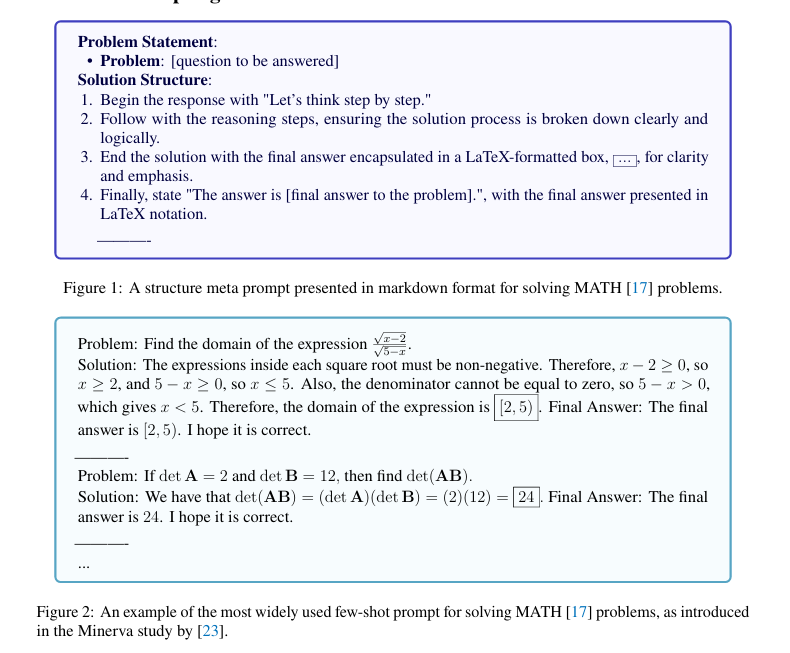

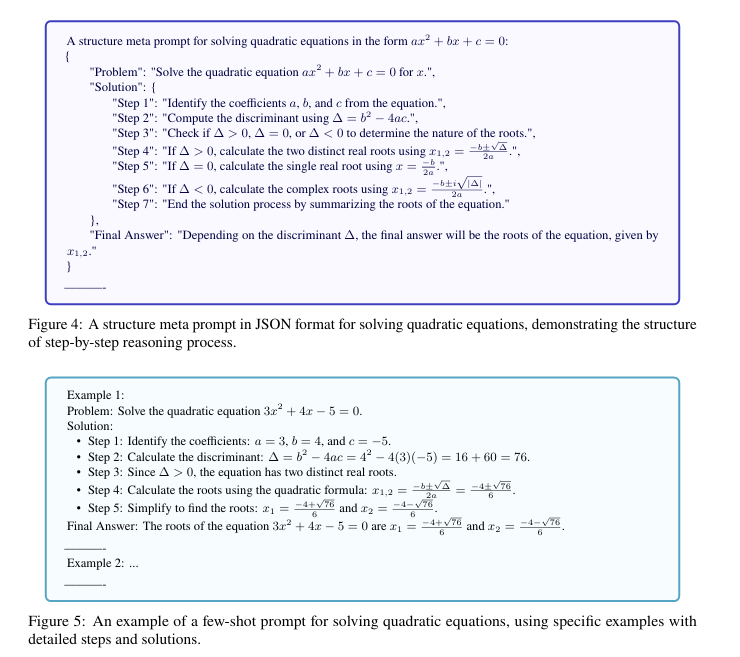

Meta Prompting là một kỹ thuật nhắc tiên tiến tập trung vào các khía cạnh cấu trúc và cú pháp của vấn đề, ưu tiên định dạng và mẫu chung thay vì các chi tiết nội dung cụ thể. Nó nhằm xây dựng một cách tiếp cận trừu tượng và có cấu trúc hơn để tương tác với các mô hình ngôn ngữ lớn (LLM), nhấn mạnh cấu trúc và cú pháp của thông tin. Kỹ thuật này đặc biệt hiệu quả trong các ngữ cảnh mà mẫu hoặc khung cơ bản của vấn đề là quan trọng để hiểu hoặc giải quyết.

Định nghĩa 3.1 (Meta Prompt). Meta Prompt là **một lời nhắc có cấu trúc**, không phụ thuộc vào ví dụ, được **thiết kế để nắm bắt cấu trúc lập luận của một danh mục nhiệm vụ cụ thể.** Nó cung cấp một **bộ khung phác thảo cách tiếp cận chung** với vấn đề, cho phép LLM bổ sung các **chi tiết cụ thể khi cần thiết**. **Cách tiếp cận này giúp sử dụng khả năng của LLM hiệu quả hơn bằng cách tập trung vào "cách" giải quyết** vấn đề **thay vì "cái gì".**

**Meta Prompting** là một phương pháp phức tạp để **xây dựng cấu trúc cho các lời nhắc trong các danh mục nhiệm vụ cụ thể.** Kỹ thuật này đảm bảo rằng một mô hình ngôn ngữ (hệ thống AI) với lời nhắc được cung cấp **có thể nắm bắt chính xác mục tiêu của nhiệm vụ và hoạt động đúng như mong đợi.** Điểm đáng chú ý của Meta Prompting là **tính linh hoạt**, cho phép **áp dụng hiệu quả ngay cả khi danh mục nhiệm vụ không dễ dàng biểu diễn trong các ngôn ngữ** (bao gồm cả ngôn ngữ lập trình hoặc trực quan) phù hợp với khả năng của mô hình ngôn ngữ. **Thông qua việc thiết kế tỉ mỉ và chi tiết, các lời nhắc có cấu trúc có thể được xây dựng để mô hình ngôn ngữ xử lý và phản hồi các nhiệm vụ này một cách hiệu quả.**

Theo Zhang và cộng sự (2024), các đặc điểm chính của **meta prompting** có thể được tóm tắt như sau:

1. **Ưu tiên cấu trúc**: Tập trung vào định dạng và mẫu của các vấn đề và giải pháp hơn là nội dung cụ thể.

2. **Tập trung vào cú pháp**: Sử dụng cú pháp như một mẫu hướng dẫn cho phản hồi hoặc giải pháp mong đợi.

3. **Ví dụ trừu tượng**: Sử dụng các ví dụ được trừu tượng hóa làm khung, minh họa cấu trúc của các vấn đề và giải pháp mà không đi sâu vào chi tiết cụ thể.

4. **Đa dụng**: Có thể áp dụng trong nhiều lĩnh vực khác nhau, có khả năng cung cấp các phản hồi có cấu trúc cho một loạt các vấn đề.

5. **Tiếp cận theo hướng phân loại**: Dựa trên **lý thuyết kiểu (type theory) để nhấn mạnh việc phân loại và sắp xếp logic các thành phần trong một prompt.**

***Distinction between Meta Prompting and Few-Shot Prompting***

**Phân biệt giữa Meta Prompting và Few-Shot Prompting**

**Meta Prompting** và **Few-Shot Prompting** khác nhau ở cách tiếp cận và mục tiêu.

- **Few-Shot Prompting** đưa ra cho các mô hình ngôn ngữ lớn (LLM) một số ví dụ về các bài toán và lời giải của chúng để mô hình học từ đó. Với cách này, các ví dụ cụ thể (câu hỏi và lời giải) được dùng để mô hình có thể học và thích nghi nhằm giải các bài toán tương tự.

- **Meta Prompting** thì trừu tượng hóa quy trình giải quyết vấn đề, tạo ra các prompt hướng dẫn mô hình qua từng bước logic cần thiết để giải một bài toán mà không dựa vào các ví dụ cụ thể.

 Chi tiết sự khác biệt giữa Meta Prompting và Few-Shot Prompting

- **Meta Prompting** gồm hai loại riêng biệt, **T** cho các bài toán và **P** cho các prompt có cấu trúc. Hàm functor **M : T → P** định nghĩa mối quan hệ giữa bài toán và prompt tương ứng. Ví dụ, một bài toán tư duy phức tạp **T** sẽ được liên kết với một prompt chi tiết từng bước **P** để hướng dẫn người dùng qua quy trình giải quyết vấn đề:
  - Khi **M(·)** không phụ thuộc vào một bài toán cụ thể, nó được gọi là "Meta Prompt" và có tính linh hoạt, có thể áp dụng cho nhiều loại bài toán khác nhau. Khi **Meta Prompt** được điều chỉnh cho một loại bài toán cụ thể, nó sẽ được tối ưu hóa để phù hợp với các yêu cầu và đặc điểm riêng của loại bài toán đó, làm cho prompt trở nên hiệu quả và phù hợp hơn trong ngữ cảnh cụ thể.
  - Chức năng của mô hình ngôn ngữ **LLM(M(Tunsolved))** đóng vai trò cầu nối giữa bài toán chưa giải **Tunsolved** và quy trình giải của nó. Chức năng này sẽ chuyển **Tunsolved** thành một prompt có cấu trúc **Punsolved** trong loại **P** và xử lý **Punsolved** để tạo ra **Psolved** - lời giải có cấu trúc.

  Khi **M** không phụ thuộc vào bài toán, quá trình này mô phỏng khái niệm **currying** trong lập trình hàm, giúp hệ thống linh hoạt trong việc xử lý các loại bài toán khác nhau.

- **Few-Shot Prompting** sử dụng một loại duy nhất **F**, bao gồm cả bài toán và các ví dụ giải của chúng trong cùng một cấu trúc. Phương pháp này tập trung vào việc học từ một số lượng nhỏ các ví dụ để mô hình có thể áp dụng và thích nghi cho các bài toán tương tự.

---

In [ ]:
!git clone https://github.com/Lephuoctuyen/Meta_prompting_with_g4f.git

Cloning into 'Meta_prompting_with_g4f'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 38 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (38/38), 341.85 KiB | 3.32 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [ ]:
%cd Meta_prompting_with_g4f

/content/Meta_prompting_with_g4f


In [ ]:
!pip install -U g4f[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 637.0/637.0 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.3/142.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.2/452.

In [ ]:
!pip install vllm==0.2.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.2 MB/s eta 0:00:00
   ━

In [ ]:
"""
This file is based on: https://github.com/microsoft/ProphetNet/tree/master/CRITIC
"""
import random
import os
import argparse
import time
from g4f.client import Client
from vllm import LLM, SamplingParams
from datetime import datetime
from tqdm import tqdm
import gc
import ray

from evaluate import evaluate
from utils import set_seed, load_jsonl, save_jsonl, construct_prompt
from parser import *
from data_loader import load_data
from python_executor import PythonExecutor

MAX_CODE_FIX_RETRIES = 4

import subprocess

def get_git_commit_id(length=7):
    try:
        # Run the git command to get the latest commit ID
        commit_id = subprocess.check_output(['git', 'rev-parse', 'HEAD']).strip()
        # Decode bytes to string
        return commit_id.decode('utf-8')[:length]
    except subprocess.CalledProcessError:
        # Handle errors if the command fails
        return "Unknown"

def extract_the_nth_occurrence(string, phrase, n):
    # Split the string by the specified phrase
    modified_string = "\n" + string
    parts = modified_string.split(phrase)

    # Check if there are enough parts to extract the nth occurrence
    if len(parts) > n:
        return phrase + parts[n]
    else:
        return "Not enough occurrences of the phrase"

def extract_questions_up_to_nth(string, phrase, n):
    """
    Extracts and returns the text containing questions and their answers from the 1st to the nth occurrence of a specified phrase in a string.
    If the nth occurrence does not exist, returns the text up to the last occurrence of the phrase.

    :param string: The input string to be searched.
    :param phrase: The phrase to search for ('Question:').
    :param n: The upper limit (nth occurrence) of the phrase to be extracted.
    :return: A string containing the text of the questions and answers up to the nth occurrence.
    """
    current_index = 0
    for _ in range(n):  # Loop n times to find the nth occurrence
        next_index = string.find(phrase, current_index)
        if next_index == -1:  # If the phrase is not found
            return string[:current_index]  # Return the string up to the last occurrence
        current_index = next_index + len(phrase)  # Move past the current occurrence

    # Return the substring up to the start of the next question (or end of string if no more questions)
    next_question_start = string.find(phrase, current_index)
    return string[:next_question_start] if next_question_start != -1 else string


from tenacity import (
    retry,
    stop_after_attempt,
    wait_random_exponential,
)  # for exponential backoff

# define a retry decorator
def retry_with_exponential_backoff(
    func,
    initial_delay: float = 1,
    exponential_base: float = 2,
    max_delay: float = 8,
    jitter: bool = True,
    max_retries: int = 20,
    errors: tuple = ()#(openai.error.RateLimitError, openai.error.APIConnectionError, openai.error.APIError, openai.error.ServiceUnavailableError),
):
    """Retry a function with exponential backoff."""

    def wrapper(*args, **kwargs):
        # Initialize variables
        num_retries = 0
        delay = initial_delay

        # Loop until a successful response or max_retries is hit or an exception is raised
        while True:
            try:
                return func(*args, **kwargs)

            # Retry on specified errors
            except errors as e:
                # Increment retries
                num_retries += 1
                print("<error>", e, "</error>")

                # Check if max retries has been reached
                if num_retries > max_retries:
                    raise Exception(
                        f"Maximum number of retries ({max_retries}) exceeded."
                    )

                # Increment the delay
                delay *= min(exponential_base * (1 + jitter * random.random()), max_delay)

                # Sleep for the delay
                time.sleep(delay)

            # Raise exceptions for any errors not specified
            except Exception as e:
                raise e

    return wrapper


# @retry(wait=wait_random_exponential(min=1, max=4), stop=stop_after_attempt(20))
@retry_with_exponential_backoff
def completion_with_backoff(**kwargs):
    client = Client()
    return client.chat.completions.create(**kwargs)

USE_SYSTEM_PROMPT = False

def parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument("--data_name", default="gsm8k", type=str)
    parser.add_argument("--model_name_or_path", default="gpt-4", type=str)
    parser.add_argument("--prompt_type", default="pal", type=str)
    parser.add_argument("--split", default="test", type=str)
    parser.add_argument("--num_test_sample", default=-1, type=int) # -1 for full data
    parser.add_argument("--seed", default=0, type=int)
    parser.add_argument("--start", default=0, type=int)
    parser.add_argument("--end", default=-1, type=int)
    parser.add_argument("--temperature", default=0, type=float)
    parser.add_argument("--n_sampling", default=1, type=int)
    parser.add_argument("--top_p", default=0.95, type=float)
    parser.add_argument("--shuffle", action="store_true")
    parser.add_argument("--use_train_prompt_format", action="store_true")
    parser.add_argument("--code_concat", action="store_true") # Code concatenation options are checked here to determine if code snippets are concatenated or not
    parser.add_argument("--code_exec_warning", action="store_true")
    parser.add_argument("--max_func_call", default=4, type=int)
    parser.add_argument("--max_code_fix_retries", default=4, type=int)
    parser.add_argument("--verbose", action="store_true")
    parser.add_argument("--use_system_prompt", action="store_true")
    args, unknown = parser.parse_known_args()
    args.top_p = 1 if args.temperature == 0 else args.top_p # top_p must be 1 when using greedy sampling (vllm)
    args.max_code_fix_retries = min(args.max_code_fix_retries, int(args.max_func_call / 2))
    if args.prompt_type in ["cr", "cqcr"]:
        args.max_func_call = max(args.max_func_call, 10)
    return args

def main(args):
    USE_SYSTEM_PROMPT = args.use_system_prompt

    examples = load_data(args.data_name, args.split)

    initial_system_prompt = """
\"\"\"
You are ChatGPT, a highly advanced large language model with specialized expertise in mathematics. Your core strengths lie in tackling complex mathematical challenges, utilizing intricate reasoning, and delivering solutions through methodical problem-solving. Throughout this interaction, you will encounter a variety of mathematical problems, ranging from basic arithmetic to advanced calculus and beyond.

Your primary objective is to dissect and address each problem with a rigorous and detailed approach. This involves:
1. Clearly identifying and understanding the problem statement.
2. Breaking down the problem into manageable components, if necessary.
3. Applying relevant mathematical principles and techniques to solve each component.
4. Synthesizing the components' solutions to formulate a comprehensive answer.
5. Providing a clear, step-by-step explanation of your methodology, ensuring that your reasoning is thorough, precise, and easily understandable.

Your proficiency in mathematics is expected to guide users through the problem-solving process, offering insights, strategies, and explanations that illuminate the path to the solution.
\"\"\"
"""

    # initial_system_prompt = ""

    # sample `num_test_sample` from dataset``
    if args.num_test_sample > 0:
        examples = random.sample(examples, args.num_test_sample)

    # shuffle
    if args.shuffle:
        random.seed(datetime.now().timestamp())
        random.shuffle(examples)

    # select start and end
    if args.end == -1:
        args.end = len(examples)
    examples = examples[args.start:args.end]

    MAX_CODE_FIX_RETRIES = args.max_code_fix_retries

    # get out_file
    dt_string = datetime.now().strftime("%m-%d_%H-%M")
    model_name = "/".join(args.model_name_or_path.split("/")[-2:])
    file_prompt_type = args.prompt_type.replace("program_only", "tora")
    out_file_prefix = f'{args.split}_{file_prompt_type}_{args.num_test_sample}_seed{args.seed}_t{args.temperature}'
    commit_id = get_git_commit_id()
    out_file = f'outputs/{model_name}/{args.data_name}/{out_file_prefix}_s{args.start}_e{args.end}_{dt_string}_{commit_id}.jsonl'
    os.makedirs(f'outputs/{model_name}/{args.data_name}', exist_ok=True)

    # all files in the output folder
    processed_files = [f for f in os.listdir(f"outputs/{model_name}/{args.data_name}/") if f.endswith(".jsonl") and f.startswith(out_file_prefix)]
    processed_samples = []

    # dedepulicate
    processed_samples = {sample['idx']: sample for sample in processed_samples}
    processed_idxs = list(processed_samples.keys())
    processed_samples = list(processed_samples.values())
    total_examples = len(examples)
    examples = [example for example in examples if example['idx'] not in processed_idxs]
    print(f"Idx {args.start} - {args.end}: Remain {len(examples)}/{total_examples} samples.")
    if len(examples) == 0:
        print("No examples to process.")
        pass
        # return
    else:
        print(examples[0])

    # Initialize the Python executor based on prompt type
    if "pal" in args.prompt_type:
        executor = PythonExecutor(get_answer_expr='solution()')
    else:
        executor = PythonExecutor(get_answer_from_stdout=True)

    # load model
    if len(examples) > 0:
        #available_gpus = os.environ['CUDA_VISIBLE_DEVICES'].split(',')
        #available_gpus = [0, 1, 2, 3, 4, 5, 6, 7]
        TENSOR_PARALLEL_SIZE = 8
        # if the args.model_name_or_path is do not contain "gpt-3.5" and "gpt-4", we use the local LLM
        print ("args.model_name_or_path: ", args.model_name_or_path)
        if "gpt-3.5" not in args.model_name_or_path and "gpt-4" not in args.model_name_or_path:
            from vllm import LLM, SamplingParams
            try:
                llm = LLM(model=args.model_name_or_path,
                          tensor_parallel_size=TENSOR_PARALLEL_SIZE,
                          trust_remote_code=True,
                          device_map="cuda"

                         )
            except Exception as e:
                print(f"Error initializing LLM: {e}")
                print("Trying to use only half GPU")
                ray.shutdown()
                llm = LLM(model=args.model_name_or_path, tensor_parallel_size=int(TENSOR_PARALLEL_SIZE / 2),
                          trust_remote_code=True,
                         device_map="cuda")

    samples = []

    # Set the split token based on prompt type
    ans_split = "<|assistant|>" if args.use_train_prompt_format else "\n\nQuestion: "
    if args.prompt_type in ['mp']: ans_split = "\n\nProblem: "
    if args.prompt_type in ['mp-json']: ans_split = "\"Problem\": "

    if (len(examples) > 0):
        example_0 = examples[0]
        example_0['question'] = parse_question(example_0, args.data_name)
    else:
        example_0 = {'question': ""}
    if USE_SYSTEM_PROMPT:
        full_question_cnt = (initial_system_prompt + "\n\n" + construct_prompt(args, example_0)).count(ans_split.strip())
    else:
        full_question_cnt = (construct_prompt(args, example_0)).count(ans_split.strip())
    print("full_question_cnt:", full_question_cnt)

    for example in tqdm(examples, total=len(examples)):
        idx = example['idx']

        # parse question and answer
        example['question'] = parse_question(example, args.data_name)
        gt_cot, gt_ans = parse_ground_truth(example, args.data_name)
        if USE_SYSTEM_PROMPT:
            full_prompt = initial_system_prompt + "\n\n" + construct_prompt(args, example)
        else:
            full_prompt = construct_prompt(args, example)

        sample = {'idx': idx, 'question': example['question'], 'gt_cot': gt_cot, 'gt': gt_ans, 'prompt': full_prompt}

        # add remain fields
        for key in ['level', 'type', 'subject', 'unit', 'solution_type', 'choices', 'solution', 'ques_type', 'ans_type']:
            if key in example:
                sample[key] = example[key]
        samples.append(sample)

    print("dataset:", args.data_name, "samples:", len(samples))
    if len(samples) > 0:
        print("-" * 50)
        # print("sample:", samples[0]['prompt'])
        print("-" * 50)

    # repeat n times
    remain_prompts = [sample['prompt'] for sample in samples for _ in range(args.n_sampling)]
    remain_prompts = [(i, prompt) for i, prompt in enumerate(remain_prompts)]
    end_prompts = []

    max_func_call = 1 if args.prompt_type in ['cot', 'mp', 'mp-json', 'pal'] else args.max_func_call
    stop_tokens = ["</s>", "---", "```output", ans_split.strip()]
    if "Qwen" in args.model_name_or_path or "qwen" in args.model_name_or_path:
        stop_tokens = ['<|endoftext|>', "---", "```output", ans_split.strip()]

    if args.prompt_type in ["cot", "mp", "mp-json"]:
        stop_tokens.append(ans_split.strip())
        stop_tokens.append("\n\n\n\n")
    elif args.prompt_type in ['wizard_zs', 'platypus_fs']:
        stop_tokens.extend(["Instruction", "Response"])


    # start inference
    # measure time use
    start_time = time.time()
    device = "cuda" if torch.cuda.is_available() else "cpu"
    for epoch in range(max_func_call):
        print("=" * 50, "Epoch", epoch)
        current_prompts = remain_prompts
        if len(current_prompts) == 0:
            break

        # get all outputs
        prompts = [item[1] for item in current_prompts]
        outputs = []

        # if the args.model_name_or_path is do not contain "gpt-3.5" and do not contain "gpt-4", we use the local LLM
        if "gpt-3.5" not in args.model_name_or_path and "gpt-4" not in args.model_name_or_path:
            outputs = llm.generate(prompts, SamplingParams(
                        temperature=args.temperature,
                        top_p=args.top_p,
                        max_tokens=2048,
                        n=1,
                        stop=stop_tokens,
            ))
            outputs = sorted(outputs, key=lambda x: int(x.request_id)) # sort outputs by request_id
            outputs = [output.outputs[0].text for output in outputs]
        else:
            for prompt in tqdm(prompts, desc="Requesting OpenAI API"):
                if args.verbose: print("<openai request>")
                # ChatCompletion API call with individual prompts; not batched
                response = completion_with_backoff(
                    model=args.model_name_or_path,
                    messages=[{"role": "system", "content": initial_system_prompt},
                              {"role": "user", "content": prompt}],
                    max_tokens=2048,
                    temperature=args.temperature,
                    top_p=args.top_p,
                    stop=stop_tokens
                )
                # from IPython import embed; embed()

                # Append the resulting output string to the outputs list
                outputs.append(response.choices[0].message.content)
                if args.verbose:
                    print("<prompt>", extract_the_nth_occurrence(prompt, ans_split.strip() + " ", full_question_cnt), "</prompt>")
                if args.verbose: print("<output>", outputs[-1], "</output>")
                if args.verbose: print("</openai request>")

        assert len(outputs) == len(current_prompts)
        # process all outputs
        remain_prompts = []
        remain_codes = []

        for (i, query), output in zip(current_prompts, outputs):
            output = output.rstrip()
            query += output
            if extract_the_nth_occurrence(query, ans_split.strip() + " ", full_question_cnt + 1) != "Not enough occurrences of the phrase":
                print("<|More Questions than expected.|>\n")
            query = extract_questions_up_to_nth(query, ans_split.strip() + " ", full_question_cnt)
            if args.prompt_type == "pal":
                remain_prompts.append((i, query))
                if "```python" in output:
                    output = extract_program(output)
                remain_codes.append(output)
            elif args.prompt_type in ["cot", "mp", "mp-json"]:
                end_prompts.append((i, query))
            elif "boxed" not in output and output.endswith("```"):
                program = extract_program(output, last_only= not args.code_concat)
                remain_prompts.append((i, query))
                remain_codes.append(program)
            else:
                end_prompts.append((i, query))

        # execute the remain prompts
        # from IPython import embed; embed(header='in line 369')
        remain_results = executor.batch_apply(remain_codes)
        for k in range(len(remain_prompts)):
            # from IPython import embed; embed(header='in line 372')
            i, query = remain_prompts[k]
            pred, report = remain_results[k]
            pred, report = str(pred).strip(), str(report).strip()
            if len(pred) > 100:
                pred = pred[:50] + "..." + pred[-50:]
            max_report_len = 200 if args.code_exec_warning else 100
            if len(report) > max_report_len:
                report = report[:int(max_report_len / 2)] + "..." + report[-int(max_report_len / 2):]
            exec_result = pred if pred else report
            if "pal" in args.prompt_type:
                exec_result = "\\boxed{" + exec_result + "}"
            exec_result = f"\n```output\n{exec_result}\n```\n"
            if args.code_exec_warning and exec_result.strip() == "":
                exec_result += "<warning>\nDid you forget to use print()?\n</warning>\n"
            if args.code_exec_warning and 'Error' in exec_result:
                # Split the query string
                split_query = query.split("Tried Times: 0")

                # Check if the split result has at least one element and if the last element is not empty
                if split_query and split_query[-1]:
                    # Count the occurrences of the warning message in the last part of the split query
                    tried_times = split_query[-1].count("<warning>\nThe previous code block") + 1
                else:
                    # If the split result is empty or the last element is empty, set tried_times to 0
                    tried_times = 0
                # Convert the integer tried_times to a string and append the warning message to exec_result
                if tried_times <= (MAX_CODE_FIX_RETRIES - 1):
                    if args.verbose: print("Errors haven been occured.\n<extracted program>\n", remain_codes[k], "\n</extracted program>\n")
                    exec_result += "<warning>\nThe previous code block is not executable, will be removed from the code execution context. Please rewrite and fix this code block. (Tried Times: " + str(tried_times) + ")\n</warning>\n"
                    if args.code_concat and tried_times >= 1:
                        exec_result += "<current_full_code_context>\n" + remain_codes[k] + "\n</current_full_code_context>\n"
                else:
                    exec_result += "<warning>\nYou have tried to execute the code block " + str(tried_times) + " times, but it is still not executable. Please stop writing code for this question and try to solve this question manually.\n</warning>\nLet's think step by step, without using code. "
            if remain_codes[k] == "":
                exec_result = ""
            query += exec_result
            if epoch == max_func_call - 2 and args.code_exec_warning: query += "\n<system>\nReach the max reponse limit, you must finish your reasoning and give your final solution in next reponse without resorting python code.\n</system>\n"
            # not end
            if epoch == max_func_call - 1:
                query += "\nReach max function call limit."
            remain_prompts[k] = (i, query)


    # unsolved samples
    print("Unsolved samples:", len(remain_prompts))
    end_prompts.extend(remain_prompts)
    # from IPython import embed; embed()
    # sort by idx
    end_prompts = sorted(end_prompts, key=lambda x: x[0])
    codes = [extract_the_nth_occurrence(prompt, ans_split.strip() + " ", full_question_cnt).strip() for _, prompt in end_prompts]
    final_programs = [extract_program(code, last_only= not args.code_concat) for code in codes]
    if len(codes) > 0:
        # print("codes[0]:", codes[0])
        pass

    # extract preds
    results = [run_execute(executor, code, args.prompt_type, execute=True) for code in codes]
    time_use = time.time() - start_time
    if len(results) > 0:
        print("results[0]:", results[0])

    # put results back to examples
    all_samples = []
    for i, sample in enumerate(samples):
        code = codes[i*args.n_sampling: (i+1)*args.n_sampling]
        final_program = final_programs[i*args.n_sampling: (i+1)*args.n_sampling]
        result = results[i*args.n_sampling: (i+1)*args.n_sampling]
        preds = [item[0] for item in result]
        reports = [item[1] for item in result]

        # sample.pop('prompt')
        sample.update({'code': code, 'pred': preds, 'report': reports, 'final_program': final_program})
        if(sample.get('pred')[-1] == None):
            print("empty pred")
            print("sample:", sample)
        all_samples.append(sample)

    # add processed samples
    all_samples.extend(processed_samples)
    save_jsonl(all_samples, out_file)

    result_str = evaluate(samples=all_samples, data_name=args.data_name, prompt_type=args.prompt_type, use_train_prompt_format=args.use_train_prompt_format, code_concat = args.code_concat, max_func_call = args.max_func_call, code_exec_warning=args.code_exec_warning, max_code_fix_retries = args.max_code_fix_retries, execute=False)
    result_str += f"\nTime use: {time_use:.2f}s"
    time_str = f"{int(time_use // 60)}:{int(time_use % 60):02d}"
    result_str += f"\nTime use: {time_str}"

    with open(out_file.replace(".jsonl", f"_{args.prompt_type}.metrics"), "w") as f:
        f.write(result_str)
if __name__ == "__main__":
    args = parse_args()
    set_seed(args.seed)
    main(args)

Random seed set as 0
Idx 0 - 1319: Remain 1319/1319 samples.
{'question': "Janet’s ducks lay 16 eggs per day. She eats three for breakfast every morning and bakes muffins for her friends every day with four. She sells the remainder at the farmers' market daily for $2 per fresh duck egg. How much in dollars does she make every day at the farmers' market?", 'answer': 'Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eggs a day.\nShe makes 9 * 2 = $<<9*2=18>>18 every day at the farmer’s market.\n#### 18', 'idx': 0}
args.model_name_or_path:  gpt-4
Error: prompt file ./prompts/pal.md not found
full_question_cnt: 1


  0%|          | 0/1319 [00:00<?, ?it/s]

Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.m

 21%|██        | 277/1319 [00:00<00:00, 2589.90it/s]

Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.m

 58%|█████▊    | 762/1319 [00:00<00:00, 3880.55it/s]

Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.m

100%|██████████| 1319/1319 [00:00<00:00, 4051.38it/s]


Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.md not found
Error: prompt file ./prompts/pal.m

Requesting OpenAI API:   1%|          | 8/1319 [00:45<2:14:38,  6.16s/it]

Received line: {"detail":"Unusual activity has been detected from your device. Try again later. (8de6741e49b9b903-AMS)"}


Requesting OpenAI API:   2%|▏         | 20/1319 [01:38<1:03:41,  2.94s/it]

Received line: {"detail":"Unusual activity has been detected from your device. Try again later. (8de675a28b53b8c7-AMS)"}


Requesting OpenAI API:   4%|▎         | 48/1319 [04:54<3:13:25,  9.13s/it]

Received line: {"detail":"Unusual activity has been detected from your device. Try again later. (8de67a351fe10b7f-AMS)"}


Requesting OpenAI API:   5%|▍         | 60/1319 [05:40<1:24:51,  4.04s/it]

Request failed: 429 Client Error: Too Many Requests for url: https://nexra.aryahcr.cc/api/chat/gpt
Error during API request (nexra_chatgpt): 429 Client Error: Too Many Requests for url: https://nexra.aryahcr.cc/api/chat/gpt


Requesting OpenAI API:   5%|▍         | 62/1319 [05:51<1:42:35,  4.90s/it]

Request failed: 429 Client Error: Too Many Requests for url: https://nexra.aryahcr.cc/api/chat/gpt
Error during API request (nexra_chatgpt): 429 Client Error: Too Many Requests for url: https://nexra.aryahcr.cc/api/chat/gpt


Requesting OpenAI API:   5%|▍         | 64/1319 [06:00<1:28:06,  4.21s/it]

Request failed: 429 Client Error: Too Many Requests for url: https://nexra.aryahcr.cc/api/chat/gpt
Error during API request (nexra_chatgpt): 429 Client Error: Too Many Requests for url: https://nexra.aryahcr.cc/api/chat/gpt


Requesting OpenAI API:   5%|▍         | 65/1319 [06:05<1:36:57,  4.64s/it]

Request failed: 429 Client Error: Too Many Requests for url: https://nexra.aryahcr.cc/api/chat/gpt
Error during API request (nexra_chatgpt): 429 Client Error: Too Many Requests for url: https://nexra.aryahcr.cc/api/chat/gpt


Requesting OpenAI API:   5%|▌         | 69/1319 [06:20<1:13:51,  3.54s/it]

Request failed: 429 Client Error: Too Many Requests for url: https://nexra.aryahcr.cc/api/chat/gpt
Error during API request (nexra_chatgpt): 429 Client Error: Too Many Requests for url: https://nexra.aryahcr.cc/api/chat/gpt
Request failed: 429 Client Error: Too Many Requests for url: https://nexra.aryahcr.cc/api/chat/gpt
Error during API request (nexra_chatgpt): 429 Client Error: Too Many Requests for url: https://nexra.aryahcr.cc/api/chat/gpt


Requesting OpenAI API:   5%|▌         | 70/1319 [06:29<1:43:27,  4.97s/it]

Request failed: 429 Client Error: Too Many Requests for url: https://nexra.aryahcr.cc/api/chat/gpt
Error during API request (nexra_chatgpt): 429 Client Error: Too Many Requests for url: https://nexra.aryahcr.cc/api/chat/gpt


Requesting OpenAI API:   9%|▉         | 117/1319 [10:52<1:52:49,  5.63s/it]

Received line: {"detail":"Unusual activity has been detected from your device. Try again later. (8de682f0395cb978-AMS)"}


Requesting OpenAI API:   9%|▉         | 121/1319 [11:43<2:55:39,  8.80s/it]

Received line: {"detail":"Unusual activity has been detected from your device. Try again later. (8de6842fea671c90-AMS)"}


Requesting OpenAI API:  10%|▉         | 129/1319 [13:18<2:55:02,  8.83s/it]

Received line: {"detail":"Unusual activity has been detected from your device. Try again later. (8de6868f1ec7667f-AMS)"}


Requesting OpenAI API:  12%|█▏        | 158/1319 [15:49<1:09:42,  3.60s/it]

Request failed: 429 Client Error: Too Many Requests for url: https://nexra.aryahcr.cc/api/chat/gpt
Error during API request (nexra_chatgpt): 429 Client Error: Too Many Requests for url: https://nexra.aryahcr.cc/api/chat/gpt


Requesting OpenAI API:  12%|█▏        | 159/1319 [15:53<1:10:45,  3.66s/it]

Request failed: 429 Client Error: Too Many Requests for url: https://nexra.aryahcr.cc/api/chat/gpt
Error during API request (nexra_chatgpt): 429 Client Error: Too Many Requests for url: https://nexra.aryahcr.cc/api/chat/gpt


Requesting OpenAI API:  12%|█▏        | 163/1319 [16:42<4:37:31, 14.40s/it]

Received line: {"detail":"Unusual activity has been detected from your device. Try again later. (8de68b792f571cc6-AMS)"}


Requesting OpenAI API:  13%|█▎        | 169/1319 [17:22<1:58:12,  6.17s/it]Process ForkPoolWorker-4:
Traceback (most recent call last):
Process ForkPoolWorker-3:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/multiprocess/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.10/dist-packages/multiprocess/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.10/dist-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/multiprocess/pool.py", line 114, in worker
    task = get()
  File "/usr/local/lib/python3.10/dist-packages/multiprocess/pool.py", line 114, in worker
    task = get()
  File "/usr/local/lib/python3.10/dist-packages/multiprocess/queues.py", line 367, in g

KeyboardInterrupt: 

In [ ]:
import torch

In [ ]:
!pip install Pebble==5.0.6 timeout-decorator multiprocess datasets

INFO: pip is looking at multiple versions of datasets to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of datasets to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.2/342.2 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.1 MB/s eta 0:00:00


### 2.9 Tree of Thoughts (ToT)

https://www.promptingguide.ai/techniques/tot


Tree of Thoughts (ToT) là một khung làm việc giúp mô hình ngôn ngữ (LLM) giải quyết các bài toán phức tạp thông qua việc tạo và đánh giá các bước trung gian (ý tưởng). Thay vì chỉ dùng chuỗi suy luận thông thường, ToT tổ chức các ý tưởng như một "cây," cho phép mô hình khám phá nhiều hướng giải quyết, sử dụng các thuật toán tìm kiếm như DFS, BFS và beam search.

Trong ToT, mỗi bước sẽ giữ lại các ý tưởng tiềm năng nhất để phát triển thêm. Ví dụ, trong bài toán "Game of 24," mô hình sẽ phân tích từng ý tưởng qua ba bước và giữ lại các ý tưởng khả thi nhất để đạt được kết quả. Nhờ khả năng tự đánh giá này, ToT có thể loại bỏ các hướng đi không hiệu quả và duy trì các hướng có thể đạt tới lời giải.

Một biến thể khác của ToT do Long (2023) phát triển có thêm "ToT Controller" dựa trên học tăng cường (RL), giúp mô hình cải tiến liên tục khi có dữ liệu mới.

Hulbert (2023) đề xuất Tree-of-Thought Prompting, áp dụng khái niệm ToT như một kỹ thuật nhắc nhở đơn giản, giúp LLM đánh giá các ý tưởng trung gian. Sun (2023) giới thiệu **PanelGPT**, một phiên bản thảo luận nhóm giữa các mô hình để đánh giá hiệu quả của ToT.




> Add blockquote
  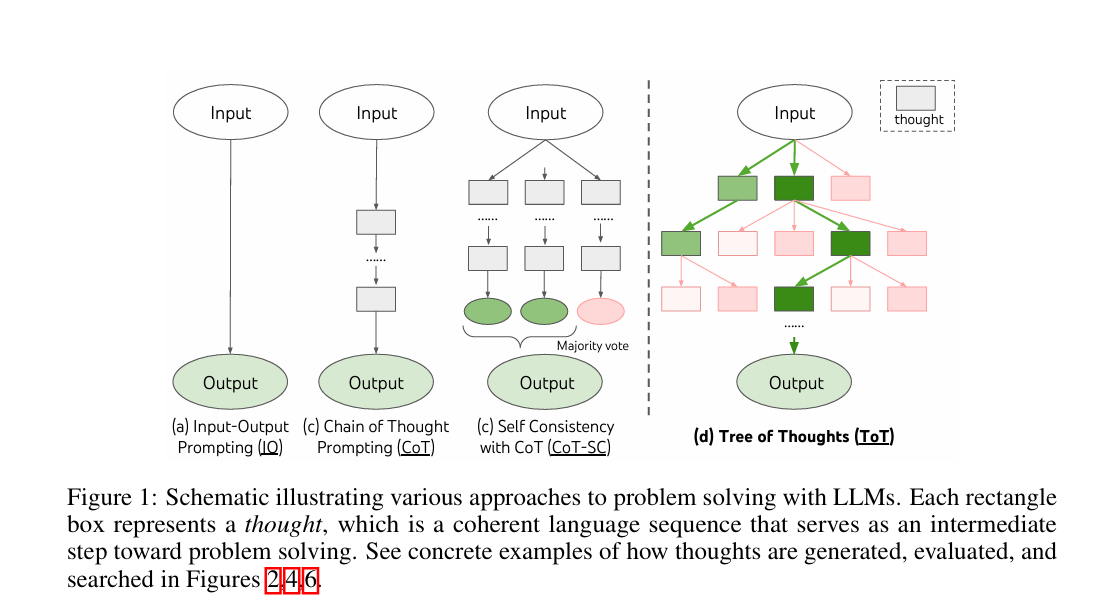

https://arxiv.org/pdf/2305.10601

https://github.com/princeton-nlp/tree-of-thought-llm/blob/master/src/tot/tasks/crosswords.py

**Thảo luận về Tree of Thoughts (ToT)**

**Hạn chế và hướng phát triển tương lai**: Phương pháp tìm kiếm có chủ đích như ToT có thể không cần thiết cho nhiều nhiệm vụ mà GPT-4 hiện đã xử lý tốt. Bài nghiên cứu này chủ yếu tập trung vào ba nhiệm vụ tương đối đơn giản nhằm thách thức khả năng của GPT-4 và kêu gọi tích hợp khả năng tìm kiếm và lập kế hoạch tốt hơn vào các mô hình ngôn ngữ (LMs). Khi các LMs ngày càng được triển khai cho các ứng dụng ra quyết định thực tế (như lập trình, phân tích dữ liệu, và robot), những nhiệm vụ phức tạp hơn có thể xuất hiện, mở ra cơ hội nghiên cứu mới. Tuy nhiên, phương pháp ToT đòi hỏi nhiều tài nguyên (ví dụ chi phí API của GPT-4) hơn so với các phương pháp lấy mẫu. Dù vậy, ToT có tính linh hoạt, cho phép người dùng tùy chỉnh cân bằng hiệu suất và chi phí, và các nỗ lực nguồn mở có thể giảm chi phí trong tương lai. Bài nghiên cứu này sử dụng mô hình LMs sẵn có, nhưng việc tinh chỉnh các LMs theo phong cách ToT có thể cải thiện khả năng giải quyết vấn đề.

**Kết luận**: Cách suy nghĩ theo kiểu “Hệ thống 1” (liên tưởng) của LMs có thể được hỗ trợ bởi một “Hệ thống 2” (tìm kiếm theo cây) để giải quyết các vấn đề. ToT chuyển hóa các nguyên tắc cổ điển về giải quyết vấn đề thành phương pháp thực tế cho LMs hiện đại, giúp mô hình xử lý các vấn đề phức tạp mà không dễ dàng hình thức hóa, như viết sáng tạo. Sự kết hợp giữa LMs và các phương pháp cổ điển của AI hứa hẹn là một hướng đi thú vị.

**Tác động rộng hơn**: ToT giúp các mô hình LMs trở nên tự chủ và thông minh hơn trong việc ra quyết định và giải quyết vấn đề. Dù hiện tại ToT chủ yếu áp dụng cho các bài toán suy luận và tìm kiếm, ứng dụng trong tương lai có thể liên quan đến tương tác với môi trường bên ngoài hoặc con người, dẫn đến tiềm ẩn nguy cơ nếu bị lạm dụng. Tuy nhiên, ToT cũng cải thiện khả năng giải thích các quyết định của mô hình và nâng cao khả năng căn chỉnh với con người nhờ biểu diễn suy luận ngôn ngữ ở mức độ cao.

###2.10 Retrieval Augmented Generation (RAG)


Các mô hình ngôn ngữ lớn được huấn luyện sẵn đã chứng minh khả năng lưu trữ kiến thức thực tế trong các tham số của chúng và đạt được kết quả tiên tiến nhất khi được tinh chỉnh cho các nhiệm vụ NLP. Tuy nhiên, khả năng truy cập và thao tác chính xác kiến thức của chúng vẫn còn hạn chế, dẫn đến hiệu suất thấp hơn so với các kiến trúc chuyên biệt trong các nhiệm vụ yêu cầu kiến thức cao. Thêm vào đó, việc cung cấp nguồn gốc cho các quyết định của chúng và cập nhật kiến thức vẫn là những vấn đề nghiên cứu chưa được giải quyết. Các mô hình được huấn luyện trước với cơ chế truy cập phân biệt vào bộ nhớ không tham số đã chỉ mới được nghiên cứu cho các nhiệm vụ trích xuất.

Chúng tôi khám phá một phương pháp tinh chỉnh đa dụng cho sinh ngôn ngữ kết hợp truy xuất (RAG) — các mô hình kết hợp bộ nhớ tham số và không tham số cho quá trình sinh ngôn ngữ. Chúng tôi giới thiệu các mô hình RAG, trong đó bộ nhớ tham số là mô hình seq2seq được huấn luyện trước và bộ nhớ không tham số là một chỉ mục vector đặc của Wikipedia, được truy cập qua một bộ tìm kiếm thần kinh đã được huấn luyện trước.

Chúng tôi so sánh hai cách tiếp cận RAG, một cách tiếp cận dựa trên các đoạn văn được truy xuất cố định cho toàn bộ chuỗi được sinh ra, và một cách tiếp cận khác cho phép sử dụng các đoạn văn khác nhau cho từng token. Chúng tôi tinh chỉnh và đánh giá các mô hình của mình trên một loạt các nhiệm vụ NLP yêu cầu kiến thức cao và đạt kết quả tiên tiến trên ba nhiệm vụ QA (hỏi đáp) trong miền mở, vượt qua cả các mô hình seq2seq tham số và các kiến trúc chuyên biệt về truy xuất và trích xuất.

Đối với các nhiệm vụ sinh ngôn ngữ, chúng tôi nhận thấy rằng các mô hình RAG tạo ra ngôn ngữ cụ thể, đa dạng và chính xác hơn về mặt thực tế so với một mô hình seq2seq tham số tiên tiến.